# DataCastle[药物分子筛选](http://www.dcjingsai.com/common/cmpt/%E5%9F%BA%E4%BA%8E%E4%BA%BA%E5%B7%A5%E6%99%BA%E8%83%BD%E7%9A%84%E8%8D%AF%E7%89%A9%E5%88%86%E5%AD%90%E7%AD%9B%E9%80%89_%E7%AB%9E%E8%B5%9B%E4%BF%A1%E6%81%AF.html)竞赛

In [1]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 建立指标

In [3]:
df_protein_train = pd.read_csv('E:\\MySQL_data\\datas_molecule\\df_protein_train.csv')   

In [ ]:
len(set(df_protein_train.Protein_ID))

可以得出Protein_ID有1653个不同的值，蛋白质信息数据没有重复值

In [4]:
df_affinity_train = pd.read_csv('E:\\MySQL_data\datas_molecule\\df_affinity_train.csv')   

In [ ]:
df1 = df_affinity_train.groupby(by = 'Protein_ID',as_index = False).count()['Protein_ID'] 
len(set(df_affinity_train.Protein_ID))

In [ ]:
set(df_protein_train.Protein_ID).difference(set(df_affinity_train.Protein_ID))

这里的df_affinity_train中的Protein_ID只有1650个不同的值，相比df_protein_train中的数据仅少了3个：Protein_ID为1170、1689、1690的蛋白质没有和任何小分子比较过。

In [5]:
df_molecule = pd.read_csv('E:\\MySQL_data\\datas_molecule\\df_molecule.csv')

In [ ]:
set(df_affinity_train.Molecule_ID).issubset(set(df_molecule.Molecule_ID))

训练集中的所有小分子的信息都在小分子信息集中

```
list1 = [i for i in df_protein_train['Protein_ID'] if i not in df1 ]
print(len(list1)) # 这里得出来的值应该是 3，但结果为351，why？

list2 = [i for i in df1  if i not in df_protein_train['Protein_ID'] ]
print(len(list2)) # 这里得出来的应该是0，但结果是347，why？
```

In [ ]:
df_molecule.cyp_3a4.notnull().sum()

将df_molecule中的不存在空值的列找出来,

In [ ]:
no_nan_columns = [i for i in df_molecule.columns if df_molecule[i].notnull().sum() == 111216]  
have_nan_columns = [i for i in df_molecule.columns if df_molecule[i].notnull().sum() < 111216]  

print(have_nan_columns,'\n',no_nan_columns)

In [ ]:
len(have_nan_columns + no_nan_columns) == len(df_molecule.columns)

返回值为True，说明已经将df_Molecule的所有列都划分到这两个list中了。

In [6]:
pd.set_option('display.max_columns', 25)
df_ki_train = df_affinity_train.merge(df_protein_train,how='left',on = 'Protein_ID').merge(df_molecule,how='left',on = 'Molecule_ID')   

In [ ]:
len(df_ki_train.columns)

In [7]:
set(df_molecule.Fingerprint.str.split(',').str.len())

{167}

In [29]:
df_ki_train.head()

,Protein_ID,Molecule_ID,Ki,Sequence,Fingerprint,cyp_3a4,cyp_2c9,cyp_2d6,ames_toxicity,fathead_minnow_toxicity,tetrahymena_pyriformis_toxicity,honey_bee,...,Fingerprint_156,Fingerprint_157,Fingerprint_158,Fingerprint_159,Fingerprint_160,Fingerprint_161,Fingerprint_162,Fingerprint_163,Fingerprint_164,Fingerprint_165,Fingerprint_166,sequence_mw
0,0,0,8.309804,MDNVLPVDSDLSPNISTNTSEPNQFVQPAWQIVLWAAAYTVIVVTS...,"1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0...",0.311594,0.742983,0.363031,0.623255,0.005905,NaN,0.800019,...,0,1,0,0,0,0,1,0,0,1,1,46232.8984
1,1,1,10.292430,MQWAVGRRWAWAALLLAVAAVLTQVVWLWLGTQSFVFQREEIAQLA...,"1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,0.854373,0.280685,NaN,0.034951,2.174478,0.846931,...,0,1,0,0,0,0,0,0,0,0,1,25109.6784
2,2,1,6.778586,MDPLNLSWYDDDLERQNWSRPFNGSEGKADRPHYNYYAMLLTLLIF...,"1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NaN,0.854373,0.280685,NaN,0.034951,2.174478,0.846931,...,0,1,0,0,0,0,0,0,0,0,1,50885.9094
3,1,2,10.769551,MQWAVGRRWAWAALLLAVAAVLTQVVWLWLGTQSFVFQREEIAQLA...,"1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.102385,0.853763,0.197318,0.745154,0.030430,2.038387,0.854921,...,0,1,0,0,0,0,1,0,0,0,1,25109.6784
4,2,2,6.170568,MDPLNLSWYDDDLERQNWSRPFNGSEGKADRPHYNYYAMLLTLLIF...,"1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.102385,0.853763,0.197318,0.745154,0.030430,2.038387,0.854921,...,0,1,0,0,0,0,1,0,0,0,1,50885.9094


In [9]:
feat = []
for i in range(0,len(df_molecule)):
    feat.append(df_molecule['Fingerprint'][i].split(', '))

feat = pd.DataFrame(feat)
feat = feat.astype('int')

feat.columns = ["Fingerprint_{0}".format(i) for i in range(0,167)] 
# 每个指纹长度都为167，所以这里range到167

feat["Molecule_ID"] = df_molecule['Molecule_ID']

In [10]:
df_ki_train = df_ki_train.merge(feat,how = 'left',on = 'Molecule_ID')

In [19]:
sequence_length = df_ki_train.Sequence.str.len()
print(len(set(sequence_length_set)))
print(sequence_length.max(),sequence_length.min())

744
7073 26


sequence有744种不同的长度，最大长度7073，最小长度26，不能采用Onehot编码
尝试计算它的分子量

In [24]:
amino_acid = "ACDEFGHIKLMNPQRSTVWY"
aa_mw = {'A': 71.0788,'C': 103.1388,'D': 115.0886,'E': 129.1155,
        'F': 147.1766,'G': 57.0519,'H': 137.1411,'I': 113.1594,
        'K': 128.1741,'L': 113.1594,'M': 131.1926,'N': 114.1038,
        'P': 97.1167,'Q': 128.1307,'R': 156.1875,'S': 87.0782,
        'T': 101.1051,'V': 99.1326,'W': 186.2132,'Y': 163.176}

In [25]:
# 计算相对分子质量
def mw(x):
    m = 0
    for i in x:
        m += aa_mw.get(i,0)
        
    return m

In [28]:
df_ki_train['sequence_mw'] = df_ki_train['Sequence'].map(mw)

In [30]:
df_ki_train['sequence_length'] = df_ki_train.Sequence.str.strip().str.len()

计算不同氨基酸在sequence中含有的个数，符号和氨基酸之间的对应见[维基百科蛋白质一级结构](https://zh.wikipedia.org/wiki/%E8%9B%8B%E7%99%BD%E8%B3%AA%E4%B8%80%E7%B4%9A%E7%B5%90%E6%A7%8B)

In [31]:
sequence_list = ['sequence_{}'.format(i) for i in amino_acid]

In [33]:
for i in amino_acid:
    df_ki_train['sequence_{}'.format(i)] = df_ki_train.Sequence.str.count(i)

Ki值在5.0，10.0左右发生迅速变化，为什么？
1、蛋白质的性质、小分子有关
2、碰巧出现的：刚好在做试验的时候，随机选出来的物质中他们ki值落在5~10中的蛋白质、分子多而已

情况|数量|说明
---|---|---
数据行数|165084|
finger_print的类别|76507| <165084,说明存在Molecule_ID不同但是分子指纹相同的情况
finger_print中有1的个数的种类|102|

In [ ]:
df_ki_train['sequence_length'] = df_ki_train.Sequence.str.strip().str.len()

In [34]:
df_ki_train.to_csv('E:\MySQL_data\datas_molecule\\df_ki_train.csv',
                    index = False,
                    encoding = 'utf-8',
                    header = True )

## 探索

In [ ]:
df_ki_train.sort_values(by = 'Ki',axis = 0,ascending = True)

### Ki整体分布情况

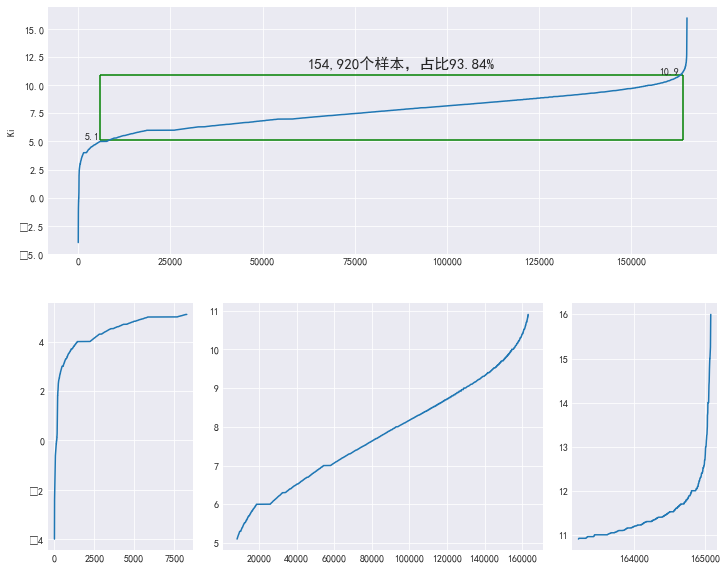

In [36]:
plt.figure(figsize = (12,10))
sns.set_style('darkgrid')
plt.rcParams['font.family'] = ['SimHei']

square_bottom = 5.1
square_top = 10.9
square_left = 6000
square_right = 164000
df_ki_train_ki_length = len(df_ki_train.Ki)

ax0 = plt.subplot2grid((2,4),(0,0),colspan = 4)
ax0.plot(list(range(df_ki_train_ki_length)),df_ki_train.sort_values(by = 'Ki',ascending = True).Ki)    

ax0.vlines(x = square_left,ymin = square_bottom,ymax = square_top,
           colors = 'green',linestyle='-')
ax0.hlines(y = square_bottom,xmin = square_left,xmax = square_right,
           colors = 'green',linestyle = '-')
ax0.hlines( y=square_top,xmin = square_left,xmax = square_right,
           colors = 'green',linestyle = '-')
ax0.vlines(x = square_right,ymin = square_bottom,ymax = square_top,
           colors = 'green',linestyle = '-')  

ax0.text(5900,square_bottom,'{}'.format(square_bottom), 
         horizontalalignment='right',verticalalignment='bottom')
ax0.text(163000,square_top,'{}'.format(square_top), 
         horizontalalignment='right',verticalalignment='bottom')

num1 = df_ki_train.loc[(df_ki_train.Ki <= square_top) & (df_ki_train.Ki >= square_bottom),'Ki'].count()
num2 = num1 / df_ki_train.Ki.count() 
ax0.text(87500,11.2,'{0:,d}个样本，占比{1:.2%}'.format(num1,num2),
        horizontalalignment='center',verticalalignment='bottom',
        fontsize = 15 )
ax0.set_ylabel('Ki')

ax1 = plt.subplot2grid((2,4),(1,0))
df1 = df_ki_train.loc[df_ki_train.Ki < square_bottom,:].sort_values(by = 'Ki',ascending = True)
ax1.plot(list(range(len(df1))),df1.Ki)


ax2 = plt.subplot2grid((2,4),(1,1),colspan = 2)
df2 = df_ki_train.loc[(df_ki_train.Ki <= square_top) & (df_ki_train.Ki >= square_bottom),:].sort_values(by = 'Ki',ascending = True) 
ax2.plot(list(range(len(df1),len(df1)+len(df2))),df2.Ki)

ax3 = plt.subplot2grid((2,4),(1,3))
df3 = df_ki_train.loc[df_ki_train.Ki > square_top,:].sort_values(by = 'Ki',ascending = True)
ax3.plot( list(range(len(df2)+len(df1),df_ki_train_ki_length )), df3.Ki )

想到了指数级增长：在任何一点往前看，都是平的，往后看都是垂直的。

In [37]:
df_ki_train['rank_ki'] = np.nan
df_ki_train.loc[df_ki_train.Ki < square_bottom,'rank_ki'] = 1
df_ki_train.loc[(df_ki_train.Ki >= square_bottom) & (df_ki_train.Ki <= square_top),'rank_ki'] = 2   
df_ki_train.loc[df_ki_train.Ki > square_top,'rank_ki'] = 3

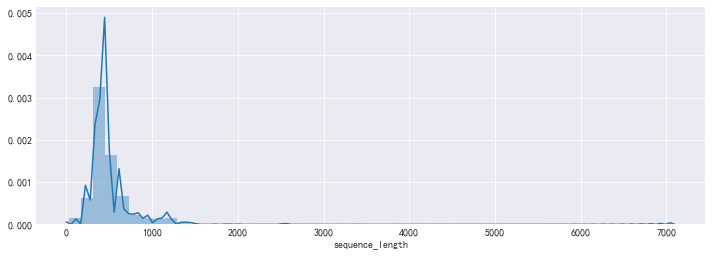

In [39]:
plt.figure(figsize = (12,4))
sns.distplot(a = df_ki_train.sequence_length,
             kde = True )

从上图可以得出，大多数蛋白质含有的氨基酸的个数<=1300个，极少量的蛋白质含有的氨基超过1300

In [ ]:
plt.figure(figsize = (5,8))
plt.rcParams['font.family'] = ['SimHei']

sns.violinplot(x = 'rank_ki',y = 'sequence_length',
            data = df_ki_train.loc[df_ki_train.sequence_length <=1700])

蛋白质中氨基酸的个数与ki值关系不明显

### 三种cyp酶与ki值之间的关系

In [ ]:
len(df_ki_train[['cyp_2c9','cyp_3a4']])

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (9,5))
sns.distplot(a = df_ki_train.groupby(by = 'sequence_length',as_index = False).count().sequence_length   
           ,kde = True)

In [ ]:
df_ki_train[['cyp_2c9','cyp_2d6']].dropna().cyp_2c9.corr(df_ki_train[['cyp_2c9','cyp_2d6']].dropna().cyp_2d6)

cyp_2c9和cyp_2d6呈现出一定的负相关，相关性很弱。

In [ ]:
sns.set_style('darkgrid')
f,ax1 = plt.subplots(1, 1, sharex=True, figsize=(8, 6))  
cyp_2c9 = df_ki_train[['cyp_2c9','cyp_2d6','cyp_3a4']].dropna()['cyp_2d6']
cyp_2c6 = df_ki_train[['cyp_2c9','cyp_2d6','cyp_3a4']].dropna()['cyp_2c9']
cyp_3a4 = df_ki_train[['cyp_2c9','cyp_2d6','cyp_3a4']].dropna()['cyp_3a4']

sns.kdeplot(cyp_2c9,ax = ax1)
sns.kdeplot(cyp_2c6,ax = ax1)
sns.kdeplot(cyp_3a4,ax = ax1,linestyle = '-.')

ax1.legend(loc='upper left')

3种cyp酶的频率分布有明显差异，但是他们和ki值的关系是？先尝试一下线性回归

In [ ]:
sns.set_style('darkgrid')
ax1 = plt.subplot2grid((2,1),(1,0))
# subplot2grid(shape,loc,) 返回loc位置的ax
# 还有其它2种方法：subplot(nrows, ncols, index, **kwargs) 返回index位置的ax  
# subplots(nrows,ncols,**kwargs) 返回figure，所有的ax

sns.regplot(x = 'cyp_2c9',y='Ki',
            data = df_ki_train[['cyp_2c9','cyp_2d6','cyp_3a4','Ki']].dropna(),
            scatter = False,
            order = 1, # 如果比1大的话，就用np.polyfit，最小二乘法进行拟合
            ci=None, # 不现实置信区间
            truncate=True,color = 'blue',
            ax = ax1)

sns.regplot( x = 'cyp_2d6',y='Ki',
            data = df_ki_train[['cyp_2c9','cyp_2d6','cyp_3a4','Ki']].dropna(),
            scatter = False,color = 'yellow',order = 1,
            ci=None, truncate=True,ax = ax1)

sns.regplot(x = 'cyp_3a4',y='Ki',
           data = df_ki_train[['cyp_2c9','cyp_2d6','cyp_3a4','Ki']].dropna(),
           scatter = False,color = 'green',order = 1,
           ci=None, truncate=True,ax = ax1)

ax1.legend(['cyp_2c9','cyp_2d6','cyp_3a4'],loc = 'lower left')

有差异，但是不明显

### 毒性测试与Ki值之间的关系

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.family'] = ['SimHei']
f,ax1 = plt.subplots(1,1,figsize = (8,6))

toxicity_list = ['ames_toxicity', 'fathead_minnow_toxicity', 
                 'tetrahymena_pyriformis_toxicity', 'honey_bee']
color_list = ['blue','green','yellow','red']
for toxicity ,color in zip(toxicity_list,color_list):
    sns.regplot(x = toxicity,y = 'Ki',
           data = df_ki_train[['ames_toxicity', 'fathead_minnow_toxicity', 
                               'tetrahymena_pyriformis_toxicity', 
                               'honey_bee','Ki']].dropna(),
           ci = None,ax = ax1,color = color,order = 2,
               scatter = False)

plt.title('毒性与Ki值关系')
loc_list = [[0.4,7.7],[0.4,6.4],[0.4,6.75],[0.4,7.4]]
for loc,toxicity in zip(loc_list,toxicity_list):
    plt.text(loc[0],loc[1],s = toxicity)

所以采用普通线性回归模型时，最好选择最小二乘法采用曲线进行拟合，sklearn中哪个方法是曲线拟合？怎么处理空值？

## 建立模型

In [40]:
features = ['cyp_2c9', 'cell_permeability', 'renal_organic_cation_transporter', 
            'solubility','sequence_length','sequence_mw'] + \
            list(feat.columns) +  sequence_list
x = df_ki_train[features]
y_true = df_ki_train['Ki']
from sklearn.model_selection import cross_val_score

In [43]:
from sklearn.isotonic import IsotonicRegression
ir = IsotonicRegression()
ir_score = cross_val_score(x,y_true,cv = 5,scoring = 'neg_mean_squared_erro').mean()
ir_score 

TypeError: estimator should be an estimator implementing 'fit' method,          cyp_2c9  cell_permeability  renal_organic_cation_transporter  \
0       0.742983           4.919215                          0.479723   
1       0.854373           4.723896                          0.492733   
2       0.854373           4.723896                          0.492733   
3       0.853763           4.731113                          0.403998   
4       0.853763           4.731113                          0.403998   
5       0.855956           4.470623                          0.699078   
6       0.855956           4.470623                          0.699078   
7       0.844784           4.723733                          0.438007   
8       0.844784           4.723733                          0.438007   
9       0.818163           4.611797                          0.463260   
10      0.818163           4.611797                          0.463260   
11      0.767587           4.580892                          0.419876   
12      0.827739           4.764075                          0.464787   
13      0.847625           4.827510                          0.289210   
14      0.745367           4.637589                          0.451774   
15      0.861112           4.780582                          0.511412   
16      0.819527           4.648481                          0.517405   
17      0.819527           4.648481                          0.517405   
18      0.868581           4.834335                          0.509358   
19      0.845722           4.786421                          0.479273   
20      0.779745           4.295628                          0.676031   
21      0.855956           4.470623                          0.699078   
22      0.838232           5.098116                          0.467400   
23      0.831821           4.803872                          0.458771   
24      0.814128           4.764205                          0.166004   
25      0.746755           4.605282                          0.469563   
26      0.881316           6.318346                          0.945403   
27      0.881316           6.318346                          0.945403   
28      0.872609           6.036971                          0.866408   
29      0.872609           6.036971                          0.866408   
...          ...                ...                               ...   
165054  0.518988           4.835622                          0.945636   
165055  0.518988           4.835622                          0.945636   
165056  0.526526           4.935046                          0.946010   
165057  0.526526           4.935046                          0.946010   
165058  0.755758           4.478928                          0.346707   
165059  0.755758           4.478928                          0.346707   
165060  0.736800           4.942215                          0.671875   
165061  0.736800           4.942215                          0.671875   
165062  0.741580           5.061981                          0.646859   
165063  0.741580           5.061981                          0.646859   
165064  0.818583           5.070583                          0.883357   
165065  0.818583           5.070583                          0.883357   
165066  0.666637           4.567254                          0.194281   
165067  0.666637           4.567254                          0.194281   
165068  0.661578           5.093137                          0.478355   
165069  0.661578           5.093137                          0.478355   
165070  0.666252           5.168532                          0.461707   
165071  0.666252           5.168532                          0.461707   
165072  0.566653           4.462368                          0.618447   
165073  0.566653           4.462368                          0.618447   
165074  0.536301           4.984632                          0.951703   
165075  0.536301           4.984632                          0.951703   
165076  0.727120           5.611473                          0.895558   
165077  0.776518           5.764202                          0.947161   
165078  0.733173           5.679347                          0.892771   
165079  0.740658           5.730108                          0.889316   
165080  0.774062           5.697332                          0.949101   
165081  0.760144           5.428389                          0.929463   
165082  0.766344           5.476897                          0.925813   
165083  0.766344           5.476897                          0.925813   

        solubility  sequence_length  sequence_mw  Fingerprint_0  \
0        -5.401525              407   46232.8984              1   
1        -5.089023              223   25109.6784              1   
2        -5.089023              444   50885.9094              1   
3        -5.124717              223   25109.6784              1   
4        -5.124717              444   50885.9094              1   
5        -4.973178              223   25109.6784              1   
6        -4.973178              444   50885.9094              1   
7        -4.886913              223   25109.6784              1   
8        -4.886913              444   50885.9094              1   
9        -5.718917              223   25109.6784              0   
10       -5.718917              444   50885.9094              0   
11       -4.883039              223   25109.6784              0   
12       -3.787272              223   25109.6784              1   
13       -5.306387              223   25109.6784              1   
14       -4.575261              223   25109.6784              0   
15       -5.430107              223   25109.6784              1   
16       -4.188601              223   25109.6784              1   
17       -4.188601              444   50885.9094              1   
18       -5.708846              223   25109.6784              1   
19       -4.979594              223   25109.6784              1   
20       -5.162942              223   25109.6784              0   
21       -4.973178              223   25109.6784              1   
22       -4.313336              223   25109.6784              1   
23       -4.336030              444   50885.9094              1   
24       -5.225652              223   25109.6784              1   
25       -4.556644              223   25109.6784              0   
26       -5.197682              398   44475.9700              1   
27       -5.197682              372   40431.8374              1   
28       -5.010872              398   44475.9700              0   
29       -5.010872              372   40431.8374              0   
...            ...              ...          ...            ...   
165054   -4.523631              578   66913.6068              1   
165055   -4.523631              564   64853.0246              1   
165056   -4.676851              578   66913.6068              1   
165057   -4.676851              564   64853.0246              1   
165058   -5.307969              578   66913.6068              1   
165059   -5.307969              564   64853.0246              1   
165060   -3.871432              578   66913.6068              1   
165061   -3.871432              564   64853.0246              1   
165062   -4.086120              578   66913.6068              1   
165063   -4.086120              564   64853.0246              1   
165064   -3.436380              578   66913.6068              1   
165065   -3.436380              564   64853.0246              1   
165066   -6.206190              578   66913.6068              1   
165067   -6.206190              564   64853.0246              1   
165068   -4.625150              578   66913.6068              1   
165069   -4.625150              564   64853.0246              1   
165070   -4.893682              578   66913.6068              1   
165071   -4.893682              564   64853.0246              1   
165072   -6.985426              578   66913.6068              1   
165073   -6.985426              564   64853.0246              1   
165074   -5.299480              578   66913.6068              1   
165075   -5.299480              564   64853.0246              1   
165076   -5.730260              157   17514.1569              1   
165077   -6.116933              157   17514.1569              1   
165078   -5.945749              157   17514.1569              1   
165079   -6.102824              157   17514.1569              1   
165080   -5.678681              157   17514.1569              1   
165081   -5.773038              157   17514.1569              1   
165082   -6.014130              157   17514.1569              1   
165083   -6.014130              157   17514.1569              1   

        Fingerprint_1  Fingerprint_2  Fingerprint_3  Fingerprint_4  \
0                   0              0              1              0   
1                   1              0              1              0   
2                   1              0              1              0   
3                   1              0              1              0   
4                   1              0              1              0   
5                   1              0              1              0   
6                   1              0              1              0   
7                   1              0              1              0   
8                   1              0              1              0   
9                   1              0              1              0   
10                  1              0              1              0   
11                  1              1              1              0   
12                  1              0              1              0   
13                  0              0              1              0   
14                  1              1              1              0   
15                  0              0              1              0   
16                  1              0              1              0   
17                  1              0              1              0   
18                  1              0              1              0   
19                  1              0              1              0   
20                  1              1              1              0   
21                  1              0              1              0   
22                  0              0              1              0   
23                  1              0              1              0   
24                  1              0              1              0   
25                  1              0              1              0   
26                  1              1              1              0   
27                  1              1              1              0   
28                  1              1              1              0   
29                  1              1              1              0   
...               ...            ...            ...            ...   
165054              0              0              1              0   
165055              0              0              1              0   
165056              0              0              1              0   
165057              0              0              1              0   
165058              0              1              1              0   
165059              0              1              1              0   
165060              0              0              1              0   
165061              0              0              1              0   
165062              0              0              1              0   
165063              0              0              1              0   
165064              0              0              1              0   
165065              0              0              1              0   
165066              0              1              1              0   
165067              0              1              1              0   
165068              0              0              1              0   
165069              0              0              1              0   
165070              0              0              1              0   
165071              0              0              1              0   
165072              0              1              1              0   
165073              0              1              1              0   
165074              0              0              1              0   
165075              0              0              1              0   
165076              0              0              1              0   
165077              0              0              1              0   
165078              0              0              1              0   
165079              0              0              1              0   
165080              0              0              1              0   
165081              0              0              1              0   
165082              0              0              1              0   
165083              0              0              1              0   

        Fingerprint_5     ...      sequence_K  sequence_L  sequence_M  \
0                   1     ...              15          33          15   
1                   1     ...               1          29           4   
2                   1     ...              24          43          18   
3                   1     ...               1          29           4   
4                   1     ...              24          43          18   
5                   1     ...               1          29           4   
6                   1     ...              24          43          18   
7                   1     ...               1          29           4   
8                   1     ...              24          43          18   
9                   1     ...               1          29           4   
10                  1     ...              24          43          18   
11                  1     ...               1          29           4   
12                  1     ...               1          29           4   
13                  1     ...               1          29           4   
14                  1     ...               1          29           4   
15                  1     ...               1          29           4   
16                  1     ...               1          29           4   
17                  1     ...              24          43          18   
18                  1     ...               1          29           4   
19                  1     ...               1          29           4   
20                  1     ...               1          29           4   
21                  1     ...               1          29           4   
22                  1     ...               1          29           4   
23                  1     ...              24          43          18   
24                  1     ...               1          29           4   
25                  1     ...               1          29           4   
26                  1     ...              12          37          14   
27                  1     ...              11          43          10   
28                  1     ...              12          37          14   
29                  1     ...              11          43          10   
...               ...     ...             ...         ...         ...   
165054              0     ...              26          72          13   
165055              0     ...              29          57          11   
165056              0     ...              26          72          13   
165057              0     ...              29          57          11   
165058              1     ...              26          72          13   
165059              1     ...              29          57          11   
165060              1     ...              26          72          13   
165061              1     ...              29          57          11   
165062              1     ...              26          72          13   
165063              1     ...              29          57          11   
165064              0     ...              26          72          13   
165065              0     ...              29          57          11   
165066              1     ...              26          72          13   
165067              1     ...              29          57          11   
165068              1     ...              26          72          13   
165069              1     ...              29          57          11   
165070              1     ...              26          72          13   
165071              1     ...              29          57          11   
165072              0     ...              26          72          13   
165073              0     ...              29          57          11   
165074              0     ...              26          72          13   
165075              0     ...              29          57          11   
165076              0     ...              12          13           4   
165077              0     ...              12          13           4   
165078              0     ...              12          13           4   
165079              0     ...              12          13           4   
165080              0     ...              12          13           4   
165081              0     ...              12          13           4   
165082              0     ...              12          13           4   
165083              0     ...              12          13           4   

        sequence_N  sequence_P  sequence_Q  sequence_R  sequence_S  \
0               17          21          10          13          34   
1                2           7          10          14          12   
2               26          27           9          28          32   
3                2           7          10          14          12   
4               26          27           9          28          32   
5                2           7          10          14          12   
6               26          27           9          28          32   
7                2           7          10          14          12   
8               26          27           9          28          32   
9                2           7          10          14          12   
10              26          27           9          28          32   
11               2           7          10          14          12   
12               2           7          10          14          12   
13               2           7          10          14          12   
14               2           7          10          14          12   
15               2           7          10          14          12   
16               2           7          10          14          12   
17              26          27           9          28          32   
18               2           7          10          14          12   
19               2           7          10          14          12   
20               2           7          10          14          12   
21               2           7          10          14          12   
22               2           7          10          14          12   
23              26          27           9          28          32   
24               2           7          10          14          12   
25               2           7          10          14          12   
26              23          21          10          18          31   
27              11          22           7          23          28   
28              23          21          10          18          31   
29              11          22           7          23          28   
...            ...         ...         ...         ...         ...   
165054          31          31          17          33          46   
165055          23          19          15          30          45   
165056          31          31          17          33          46   
165057          23          19          15          30          45   
165058          31          31          17          33          46   
165059          23          19          15          30          45   
165060          31          31          17          33          46   
165061          23          19          15          30          45   
165062          31          31          17          33          46   
165063          23          19          15          30          45   
165064          31          31          17          33          46   
165065          23          19          15          30          45   
165066          31          31          17          33          46   
165067          23          19          15          30          45   
165068          31          31          17          33          46   
165069          23          19          15          30          45   
165070          31          31          17          33          46   
165071          23          19          15          30          45   
165072          31          31          17          33          46   
165073          23          19          15          30          45   
165074          31          31          17          33          46   
165075          23          19          15          30          45   
165076          11           6           5           2          17   
165077          11           6           5           2          17   
165078          11           6           5           2          17   
165079          11           6           5           2          17   
165080          11           6           5           2          17   
165081          11           6           5           2          17   
165082          11           6           5           2          17   
165083          11           6           5           2          17   

        sequence_T  sequence_V  sequence_W  sequence_Y  
0               28          43           9          24  
1               17          18          11           8  
2               29          35           7          17  
3               17          18          11           8  
4               29          35           7          17  
5               17          18          11           8  
6               29          35           7          17  
7               17          18          11           8  
8               29          35           7          17  
9               17          18          11           8  
10              29          35           7          17  
11              17          18          11           8  
12              17          18          11           8  
13              17          18          11           8  
14              17          18          11           8  
15              17          18          11           8  
16              17          18          11           8  
17              29          35           7          17  
18              17          18          11           8  
19              17          18          11           8  
20              17          18          11           8  
21              17          18          11           8  
22              17          18          11           8  
23              29          35           7          17  
24              17          18          11           8  
25              17          18          11           8  
26              38          31           7          14  
27              22          37           6          11  
28              38          31           7          14  
29              22          37           6          11  
...            ...         ...         ...         ...  
165054          32          34          13          27  
165055          34          36          15          21  
165056          32          34          13          27  
165057          34          36          15          21  
165058          32          34          13          27  
165059          34          36          15          21  
165060          32          34          13          27  
165061          34          36          15          21  
165062          32          34          13          27  
165063          34          36          15          21  
165064          32          34          13          27  
165065          34          36          15          21  
165066          32          34          13          27  
165067          34          36          15          21  
165068          32          34          13          27  
165069          34          36          15          21  
165070          32          34          13          27  
165071          34          36          15          21  
165072          32          34          13          27  
165073          34          36          15          21  
165074          32          34          13          27  
165075          34          36          15          21  
165076           5          16           3           6  
165077           5          16           3           6  
165078           5          16           3           6  
165079           5          16           3           6  
165080           5          16           3           6  
165081           5          16           3           6  
165082           5          16           3           6  
165083           5          16           3           6  

[165084 rows x 194 columns] was passed

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_score = cross_val_score(lr,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  
lr_score

-2.2479637569991988

In [ ]:
# from sklearn import neighbors
# knn = neighbors.KNeighborsRegressor(5,weights = 'distance')
# score_knn = cross_val_score(knn,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()

In [50]:
knn_score = -19.06201361

score_knn = -19.06201361<br>
算一遍大概用了5分钟

In [52]:
# from sklearn import tree
# dtr = tree.DecisionTreeRegressor()
# dtr_score = cross_val_score(dtr,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  
dtr_score =-16.358652077676734

dtr_score = -16.358652077676734
大概用了1分钟，但是一直没有运行结束

In [56]:
# from sklearn import ensemble
# rfr = ensemble.RandomForestRegressor(10)
# rfr_score = cross_val_score(rfr,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  
rfr_score = -14.365528859046643

rfr_score = -14.365528859046643
用了5分钟

In [ ]:
# from sklearn import svm
# svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
# cross_val_score(svr,x,y_true,cv=2,scoring = 'neg_mean_squared_error').mean()
# 这个算了5分钟还没算出来，放弃了

In [44]:
from sklearn import linear_model
sgdr = linear_model.stochastic_gradient.SGDRegressor()
sgdr_score = cross_val_score(sgdr,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  

sgdr_score

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-2.8364053732312495e+36

In [45]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0.1)
lasso_score = cross_val_score(lasso,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean() 
lasso_score

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\miniconda\envs\course_py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


-2.3498172135188775

lasso_score = -2.34899458418018
大概算了2分钟

In [46]:
ridge = linear_model.Ridge(alpha = 0.5)
ridge_score = cross_val_score(ridge,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean() 
ridge_score

-2.2473856639920244

In [47]:
from sklearn import linear_model
br = linear_model.BayesianRidge()
br_score = cross_val_score(br,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  
br_score

-2.2402294166956773

In [58]:
# from sklearn.ensemble import AdaBoostRegressor
# abr = AdaBoostRegressor()
# abr_score = cross_val_score(abr,x,y_true,cv=5,scoring='neg_mean_squared_error').mean()  
# abr_score
abr_score = np.nan
# 算了5分钟+，放弃用它了

In [59]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr = GradientBoostingRegressor()
# gbr_score = cross_val_score(gbr,x,y_true,cv=5,scoring='neg_mean_squared_error').mean()  
gbr_score  =-8.8891131156880245
# 计算了5分钟+ ，效果也不好，以后不用了

In [60]:
# from sklearn.ensemble import BaggingRegressor
# bgr = BaggingRegressor()
# bgr_score = cross_val_score(bgr,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  
# 算了5分钟+，放弃用这个了
bgr_score = -15.202450905551052

In [61]:
# from sklearn.tree import ExtraTreeRegressor
# etr = ExtraTreeRegressor()
# etr_score = cross_val_score(etr,x,y_true,cv=5,scoring = 'neg_mean_squared_error').mean()  
etr_score = -3.9789111357868365
# 用时5+，放弃了

In [62]:
models = [['LinearRegression',lr_score,'instantly'],
          ['KNeighborsRegressor',knn_score,'5 min +'],
          ['DecisionTreeRegressor',dtr_score,'1 min +'],
          ['RandomForestRegressor',rfr_score,'5 min +'],
          ['SGDRegressor',sgdr_score,'instantly'],
          ['Lasso',lasso_score,'2 min +'],
          ['Ridge',ridge_score,'instantly'],
          ['BayesianRidge',br_score,'instantly'],
          ['AdaBoostRegressor',abr_score,'inf'],
         [ 'GradientBoostingRegressor',gbr_score,'instantly'],
          ['BaggingRegressor',bgr_score,'instantly'],
         [ 'ExtraTreeRegressor',etr_score,'5 min +']]

In [63]:
df_score = pd.DataFrame(models)
df_score.columns = ['model','score','time']
df_score.sort_values(by='score',ascending = False) 

,model,score,time
7,BayesianRidge,-2.240229e+00,instantly
6,Ridge,-2.247386e+00,instantly
0,LinearRegression,-2.247964e+00,instantly
5,Lasso,-2.349817e+00,2 min +
11,ExtraTreeRegressor,-3.978911e+00,5 min +
9,GradientBoostingRegressor,-8.889113e+00,instantly
3,RandomForestRegressor,-1.436553e+01,5 min +
10,BaggingRegressor,-1.520245e+01,instantly
2,DecisionTreeRegressor,-1.635865e+01,1 min +
1,KNeighborsRegressor,-1.906201e+01,5 min +


## 测试集

In [66]:
len(set(df_affinity_test.Protein_ID))

413

只有413种不同的Protein_ID

In [ ]:
set(df_affinity_test.Protein_ID).isdisjoint(set(df_protein_train.Protein_ID))

a.isdisjoint(b)  True if a and b have no elements in common <br>
需要预测(test)的蛋白质都不在训练集中，所以预测时要从氨基酸这个level去预测，训练模型时也要从这个level出发

In [ ]:
set(df_affinity_test.Molecule_ID).issubset(set(df_molecule.Molecule_ID))

a.issubset(b) N/A True if the elements of a are all contained in b <br>
需要预测(test)的小分子信息都在小分子数据集(df_molecule)中

In [65]:
df_affinity_test = pd.read_csv('E:\\MySQL_data\\datas_molecule\\df_affinity_test_toBePredicted.csv')     

df_protein_test = pd.read_csv('E:\\MySQL_data\\datas_molecule\\df_protein_test.csv')    

df_ki_test = df_affinity_test.merge(df_protein_test,how = 'left',on = 'Protein_ID').merge(df_molecule,how = 'left',on = 'Molecule_ID')   

df_ki_test = df_ki_test.merge(feat,how = 'left',on = 'Molecule_ID')

df_ki_test['sequence_length'] = df_ki_test.Sequence.str.len()

In [67]:
for i in amino_acid:
    df_ki_test['sequence_{}'.format(i)] = df_ki_train.Sequence.str.count(i)

In [68]:
df_ki_test['sequence_mw'] = df_ki_test.Sequence.map(mw)

In [73]:
model = br.fit(x,y_true)

In [72]:
x_test = df_ki_test[features]
y_pred = model.predict(x_test)
df_ki_test['Ki'] = y_pred
df_ki_test[['Protein_ID','Molecule_ID','Ki']].to_csv('E:\\MySQL_data\\datas_molecule\\df_affinity_test.csv',
                                                     index = False,
                                                    encoding = 'utf-8',
                                                    header = True)   